In [15]:
import numpy as np
import warnings
from utils import *
from calibrators import * 
import pickle
warnings.filterwarnings("ignore")
import torch
import sys
sys.path.append('../')
import time
import copy
from SLURM.sklearn_config import *
from ModelInfo import *
import tensorflow as tf

- PCA
- Random choice of pixels
- random choice of images
- K-means on images (according to classes?)
- resizing layers


# Resize

In [4]:
resized = keras.layers.Resizing(10,10, interpolation="bilinear")
#String, the interpolation method. Defaults to "bilinear".
#Supports "bilinear", "nearest", "bicubic", "area", "lanczos3", "lanczos5", "gaussian", "mitchellcubic".

In [41]:
model_info= load_model('SignLanguage', 'RF', 0)
model_info.data.X_train.shape

(20775, 784)

In [21]:
pixels=int(sqrt(model_info.data.X_train.shape[1]))
X_train=torch.tensor(model_info.data.X_train.reshape((pixels,pixels,len(model_info.data.X_train))))
model_info.data.X_train = tf.image.resize(X_train, [size,size]).numpy().reshape(len(model_info.data.X_train),-1)
X_test=torch.tensor(model_info.data.X_test.reshape((pixels,pixels,len(model_info.data.X_test))))
model_info.data.X_test = tf.image.resize(X_test, [size,size]).numpy().reshape(len(model_info.data.X_test),-1)
X_val=torch.tensor(model_info.data.X_val.reshape((pixels,pixels,len(model_info.data.X_val))))
model_info.data.X_val = tf.image.resize(X_val, [size,size]).numpy().reshape(len(model_info.data.X_val),-1)

In [44]:
length= len(model_info.data.X_train)
X_train=torch.tensor(model_info.data.X_train.reshape(length,pixels,pixels))
X_train = X_train[ ..., tf.newaxis]
model_info.data.X_train=tf.image.resize(X_train, [size,size]).numpy().reshape(length,-1)

torch.Size([20775, 28, 28, 1])


(196,)

In [46]:
#avg(2)
method_name='Resize'
red_param=2
all_time=[]
for dataset_name in ['Fashion']:#'MNIST','SignLanguage',
    for model_name in ['RF','GB','pytorch']:
        for shuffle in range(1):
            if model_name=='pytorch':
                model_info=load_model_pytorch(dataset_name, model_name, shuffle)
            else:
                model_info= load_model(dataset_name, model_name, shuffle)
            data=model_info.data
            pixels=int(sqrt(data.X_train.shape[1]))
            size=pixels//red_param
            
            length= len(model_info.data.X_train)
            X_train=torch.tensor(model_info.data.X_train.reshape(length,pixels,pixels))
            X_train = X_train[ ..., tf.newaxis]
            model_info.data.X_train=tf.image.resize(X_train, [size,size]).numpy().reshape(length,-1)
            
            length= len(model_info.data.X_test)
            X_test=torch.tensor(model_info.data.X_test.reshape(length,pixels,pixels))
            X_test = X_test[ ..., tf.newaxis]
            model_info.data.X_test=tf.image.resize(X_test, [size,size]).numpy().reshape(length,-1)
            
            length= len(model_info.data.X_val)
            X_val=torch.tensor(model_info.data.X_val.reshape(length,pixels,pixels))
            X_val = X_val[ ..., tf.newaxis]
            model_info.data.X_val=tf.image.resize(X_val, [size,size]).numpy().reshape(length,-1)
            
            print("done")
            print(model_info.data.X_train.shape,model_info.data.X_val.shape,model_info.data.X_test.shape)
            num_label=model_info.data.num_labels
            stability,time_all,ex_in_time=new_stability_calc(np.array(model_info.data.X_train),np.array(model_info.data.X_val),model_info.data.y_train,model_info.y_pred_val,num_label)
            print("train")
            stability_test,_,_=new_stability_calc(np.array(model_info.data.X_train),np.array(model_info.data.X_test),model_info.data.y_train,model_info.y_pred_test,num_label)

            all_time.append((model_name,time_all,ex_in_time))
            np.save(f'./stab/{dataset_name}/stab_{method_name}_{dataset_name}_{model_name}_{shuffle}.npy',stability)
            np.save(f'./stab/{dataset_name}/test_stab_{method_name}_{dataset_name}_{model_name}_{shuffle}.npy',stability_test)

all_time

done
(42000, 196) (14000, 196) (14000, 196)
train
done
(42000, 196) (14000, 196) (14000, 196)


KeyboardInterrupt: 

(array([2.000e+00, 1.100e+01, 1.700e+02, 3.530e+03, 6.046e+03, 2.437e+03,
        1.167e+03, 5.150e+02, 1.140e+02, 8.000e+00]),
 array([-221.90065002, -162.35749969, -102.81434937,  -43.27119904,
          16.27195129,   75.81510162,  135.35825195,  194.90140228,
         254.44455261,  313.98770294,  373.53085327]),
 <BarContainer object of 10 artists>)

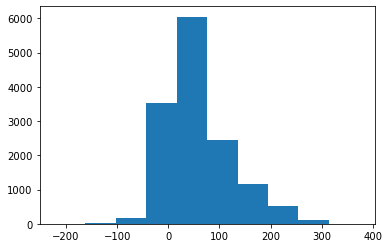

In [48]:
X=np.load(f'./stab/{dataset_name}/stab_{method_name}_{dataset_name}_RF_{shuffle}.npy')
plt.hist(X)

In [ ]:
#resize(2-4)
method_name='Resize'
all_time=[]
for red_param in [2,3,4]:
    for dataset_name in ['Fashion','MNIST','SignLanguage']:
        for model_name in ['RF','GB','pytorch']:
            for shuffle in range(10):
                if model_name=='pytorch':
                    model_info=load_model_pytorch(dataset_name, model_name, shuffle)
                else:
                    model_info= load_model(dataset_name, model_name, shuffle)
                data=model_info.data
                pixels=int(sqrt(data.X_train.shape[1]))
                size=pixels//red_param

                length= len(model_info.data.X_train)
                X_train=torch.tensor(model_info.data.X_train.reshape(length,pixels,pixels))
                X_train = X_train[ ..., tf.newaxis]
                model_info.data.X_train=tf.image.resize(X_train, [size,size]).numpy().reshape(length,-1)

                length= len(model_info.data.X_test)
                X_test=torch.tensor(model_info.data.X_test.reshape(length,pixels,pixels))
                X_test = X_test[ ..., tf.newaxis]
                model_info.data.X_test=tf.image.resize(X_test, [size,size]).numpy().reshape(length,-1)

                length= len(model_info.data.X_val)
                X_val=torch.tensor(model_info.data.X_val.reshape(length,pixels,pixels))
                X_val = X_val[ ..., tf.newaxis]
                model_info.data.X_val=tf.image.resize(X_val, [size,size]).numpy().reshape(length,-1)
            
                num_label=model_info.data.num_labels
                stability,time_all,ex_in_time=new_stability_calc(np.array(model_info.data.X_train),np.array(model_info.data.X_val),model_info.data.y_train,model_info.y_pred_val,num_label)
                stability_test,_,_=new_stability_calc(np.array(model_info.data.X_train),np.array(model_info.data.X_test),model_info.data.y_train,model_info.y_pred_test,num_label)

                all_time.append((model_name,time_all,ex_in_time))
                np.save(f'./stab/{dataset_name}/stab_{method_name}_{red_param}_{dataset_name}_{model_name}_{shuffle}.npy',stability)
                np.save(f'./stab/{dataset_name}/test_stab_{method_name}_{red_param}_{dataset_name}_{model_name}_{shuffle}.npy',stability_test)

all_time

# PCA

In [52]:
from sklearn.decomposition import PCA

In [54]:
#PCA(2-4)
method_name='PCA'
all_time=[]
for red_param in [2,3,4]:
    for dataset_name in ['Fashion','MNIST','SignLanguage']:
        for model_name in ['RF','GB','pytorch']:
            for shuffle in range(10):
                if model_name=='pytorch':
                    model_info=load_model_pytorch(dataset_name, model_name, shuffle)
                else:
                    model_info= load_model(dataset_name, model_name, shuffle)
                data=model_info.data
                pixels=int(sqrt(data.X_train.shape[1]))
                size=pixels//red_param
                pca = PCA(n_components=size**2)
                
                model_info.data.X_train=pca.fit_transform(model_info.data.X_train)

                model_info.data.X_test=pca.transform(model_info.data.X_test)
              
                model_info.data.X_val=pca.transform(model_info.data.X_val)
            
            
                print(model_info.data.X_train.shape,model_info.data.X_val.shape,model_info.data.X_test.shape)

                num_label=model_info.data.num_labels
                stability,time_all,ex_in_time=new_stability_calc(np.array(model_info.data.X_train),np.array(model_info.data.X_val),model_info.data.y_train,model_info.y_pred_val,num_label)
                stability_test,_,_=new_stability_calc(np.array(model_info.data.X_train),np.array(model_info.data.X_test),model_info.data.y_train,model_info.y_pred_test,num_label)

                all_time.append((model_name,time_all,ex_in_time))
                np.save(f'./stab/{dataset_name}/stab_{method_name}_{red_param}_{dataset_name}_{model_name}_{shuffle}.npy',stability)
                np.save(f'./stab/{dataset_name}/test_stab_{method_name}_{red_param}_{dataset_name}_{model_name}_{shuffle}.npy',stability_test)

all_time

(42000, 196) (14000, 196) (14000, 196)


KeyboardInterrupt: 

# Random choice of pixels

In [ ]:
np.random.randint(0,255, size=pixels//red_param)

In [55]:
np.random.randint(0,255, size=196)

array([193,  14, 107, 138,  35,  35, 225, 160, 146, 155,  63,  42,  95,
       166, 129,  83,  48, 198, 234,  27,   9, 138, 194,  52,  23,  98,
       186, 201, 148,  97, 222, 118,  18, 241, 175,  29, 137,   6, 154,
       167, 229,  78, 206, 125, 137,  68,  41, 224,  44, 163, 129, 215,
       215, 184,  59, 246, 128,  93, 207, 168, 111, 183,  19, 146, 238,
        57, 106,  38,  92,  93, 110, 167,  12,  82, 169,  13,  29,  27,
        97,  95, 190, 187, 135, 156,  13, 103, 228,  11,  30,  25,   5,
        98, 163, 200,  80,  50, 189,  76, 247, 219, 119,   8, 159,  67,
         7, 209,  78,  14, 222,   2, 210,  85, 249,  18, 224,  29,  64,
       254,  26, 105,  70,  86, 160, 101, 102, 208,  93, 188, 197,  76,
        59, 182,  44,  28, 253,  18,  45,   5, 199, 173,  22, 147,  30,
         2,  54,  52,  43, 155, 127,  23,  48, 168, 106, 168,  20, 214,
       122, 180, 196,  65, 203, 183,  30, 213,  46,  51,  41, 248, 214,
       197,   7,   8, 200,  51, 213, 179, 155,  46, 118,  26,  4

In [58]:
#random_pixels(2-4)
method_name='rand_pix'
all_time=[]
for red_param in [2,3,4]:
    for dataset_name in ['Fashion','MNIST','SignLanguage']:
        for model_name in ['RF','GB','pytorch']:
            for shuffle in range(10):
                if model_name=='pytorch':
                    model_info=load_model_pytorch(dataset_name, model_name, shuffle)
                else:
                    model_info= load_model(dataset_name, model_name, shuffle)
                data=model_info.data
                pixels=int(sqrt(data.X_train.shape[1]))
                size=(pixels//red_param)**2
                string=np.random.randint(0,255, size=size)
                
                model_info.data.X_train=model_info.data.X_train[:,string]

                model_info.data.X_test=model_info.data.X_test[:,string]
              
                model_info.data.X_val=model_info.data.X_val[:,string]
            
            
                print(model_info.data.X_train.shape,model_info.data.X_val.shape,model_info.data.X_test.shape)

                num_label=model_info.data.num_labels
                stability,time_all,ex_in_time=new_stability_calc(np.array(model_info.data.X_train),np.array(model_info.data.X_val),model_info.data.y_train,model_info.y_pred_val,num_label)
                stability_test,_,_=new_stability_calc(np.array(model_info.data.X_train),np.array(model_info.data.X_test),model_info.data.y_train,model_info.y_pred_test,num_label)

                all_time.append((model_name,time_all,ex_in_time))
                np.save(f'./stab/{dataset_name}/stab_{method_name}_{red_param}_{dataset_name}_{model_name}_{shuffle}.npy',stability)
                np.save(f'./stab/{dataset_name}/test_stab_{method_name}_{red_param}_{dataset_name}_{model_name}_{shuffle}.npy',stability_test)

all_time

(42000, 196) (14000, 196) (14000, 196)


KeyboardInterrupt: 

In [60]:
model_info.data.X_train.shape

(42000, 196)

# random subset

In [82]:
#random_subset(2-4)
method_name='rand_set'
all_time=[]
for red_param in [2,3,4]:
    for dataset_name in ['Fashion','MNIST','SignLanguage']:
        for model_name in ['RF','GB','pytorch']:
            for shuffle in range(10):
                if model_name=='pytorch':
                    model_info=load_model_pytorch(dataset_name, model_name, shuffle)
                else:
                    model_info= load_model(dataset_name, model_name, shuffle)
                data=model_info.data
                length=model_info.data.X_train.shape[0]
                size=(length//red_param)
                string=np.random.randint(0,length, size=size)
                
                model_info.data.X_train=model_info.data.X_train[string,:]
                model_info.data.y_train=model_info.data.y_train[string]
                print(model_info.data.X_train.shape,model_info.data.X_val.shape,model_info.data.X_test.shape)

                num_label=model_info.data.num_labels
                stability,time_all,ex_in_time=new_stability_calc(np.array(model_info.data.X_train),np.array(model_info.data.X_val),model_info.data.y_train,model_info.y_pred_val,num_label)
                stability_test,_,_=new_stability_calc(np.array(model_info.data.X_train),np.array(model_info.data.X_test),model_info.data.y_train,model_info.y_pred_test,num_label)

                all_time.append((model_name,time_all,ex_in_time))
                np.save(f'./stab/{dataset_name}/stab_{method_name}_{red_param}_{dataset_name}_{model_name}_{shuffle}.npy',stability)
                np.save(f'./stab/{dataset_name}/test_stab_{method_name}_{red_param}_{dataset_name}_{model_name}_{shuffle}.npy',stability_test)

all_time

(21000, 784) (14000, 784) (14000, 784)


KeyboardInterrupt: 

# K-means

In [61]:
from sklearn.cluster import KMeans


In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [124]:
%%time
model_info= load_model('Fashion', 'RF', 0)
red_param=5
num_label=model_info.data.num_labels
new_points=[]
new_y=[]
for i in range(num_label):
    idx_same=np.where(model_info.data.y_train==i)    
    size=len(idx_same[0])//red_param**2
    kmeans = KMeans(n_clusters=size)
    kmeans.fit(model_info.data.X_train[idx_same])
    new_points.append(kmeans.cluster_centers_)
    new_y.append([i]*size)
    print(i)
new_points

0
1
2
3
4
5
6
7
8
9
CPU times: user 5min 5s, sys: 5.03 s, total: 5min 10s
Wall time: 1min 13s


[array([[4.33680869e-19, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 1.38777878e-17],
        [4.33680869e-19, 0.00000000e+00, 3.70370370e-02, ...,
         5.55111512e-17, 0.00000000e+00, 1.38777878e-17],
        [2.16840434e-19, 1.88679245e-02, 1.88679245e-01, ...,
         1.88679245e-02, 0.00000000e+00, 6.93889390e-18],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [2.16840434e-19, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 2.77555756e-17, 6.93889390e-18],
        [2.16840434e-19, 3.46944695e-18, 0.00000000e+00, ...,
         1.00000000e+00, 0.00000000e+00, 6.93889390e-18]]),
 array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -1.38777878e-17,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         -1.38777878e-17,  0.00000000e+00,  0.00000000e+00],
        [ 0.0

In [128]:
new_X=np.array([img for class_grp in new_points for img in class_grp])
new_y=np.array([i for listt in new_y for i in listt])
print(new_X.shape,new_y.shape)
print(new_X)
print(new_y)


(1674, 784) (1674,)
[[ 4.33680869e-19  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  1.38777878e-17]
 [ 4.33680869e-19  0.00000000e+00  3.70370370e-02 ...  5.55111512e-17
   0.00000000e+00  1.38777878e-17]
 [ 2.16840434e-19  1.88679245e-02  1.88679245e-01 ...  1.88679245e-02
   0.00000000e+00  6.93889390e-18]
 ...
 [ 0.00000000e+00  1.73472348e-18  1.73472348e-18 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   4.44089210e-16  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -8.88178420e-16
  -4.44089210e-16 -1.38777878e-17]]
[0 0 0 ... 9 9 9]


In [130]:
def create_reduced_kmeans(X_train,y_train,num_label,red_param):
    new_points=[]
    new_y=[]
    for i in range(num_label):
        idx_same=np.where(y_train==i)    
        size=len(idx_same[0])//(red_param**2)
        kmeans = KMeans(n_clusters=size)
        kmeans.fit(X_train[idx_same])
        new_points.append(kmeans.cluster_centers_)
        new_y.append([i]*size)    
    new_X=np.array([img for class_grp in new_points for img in class_grp])
    new_y=np.array([i for listt in new_y for i in listt])
    return new_X, new_y
    

In [133]:
#K-means(2-4)
method_name='kmeans'
all_time=[]
for red_param in [2,3,4]:
    for dataset_name in ['Fashion','MNIST','SignLanguage']:
        for model_name in ['RF','GB','pytorch']:
            for shuffle in range(10):
                if model_name=='pytorch':
                    model_info=load_model_pytorch(dataset_name, model_name, shuffle)
                else:
                    model_info= load_model(dataset_name, model_name, shuffle)
                
                
                num_label=model_info.data.num_labels
                model_info.data.X_train,model_info.data.y_train = create_reduced_kmeans(model_info.data.X_train,model_info.data.y_train,num_label,red_param)
                print(model_info.data.X_train.shape,model_info.data.X_val.shape,model_info.data.X_test.shape)

                stability,time_all,ex_in_time=new_stability_calc(np.array(model_info.data.X_train),np.array(model_info.data.X_val),model_info.data.y_train,model_info.y_pred_val,num_label)
                stability_test,_,_=new_stability_calc(np.array(model_info.data.X_train),np.array(model_info.data.X_test),model_info.data.y_train,model_info.y_pred_test,num_label)

                all_time.append((model_name,time_all,ex_in_time))
                np.save(f'./stab/{dataset_name}/stab_{method_name}_{red_param}_{dataset_name}_{model_name}_{shuffle}.npy',stability)
                np.save(f'./stab/{dataset_name}/test_stab_{method_name}_{red_param}_{dataset_name}_{model_name}_{shuffle}.npy',stability_test)

all_time

(1674, 784) (14000, 784) (14000, 784)


KeyboardInterrupt: 

In [ ]:
Series = []
datasets = ['MNIST','Fashion','SignLanguage','CIFAR_RGB','GTSRB_RGB']
models = ['RF','GB','pytorch']
for dataset_name in datasets:
    for model_name in models:
        ECEs = []
        for shuffle in range(10):
            print(f'calculating {dataset_name}-{model_name}-{shuffle} ece....')
            ece = {}
            PATH_model= f'./stab/{dataset_name}/stab_2pool_{dataset_name}_{model_name}_{shuffle}.npy'
            
            # if not os.path.exists(PATH_model):
            #     continue
            #load model
            
            #model_info= load_model(dataset_name, model_name, shuffle)
            model_info= load_shuffle(dataset_name, model_name, shuffle)
            data=copy.copy(model_info.data)
            if model_name!='pytorch':
                model_dir =  f'{dataset_name}/{shuffle}/model/model_{dataset_name}_{model_name}.sav'
                model = pickle.load(open(model_dir, 'rb'))
            
            # compute ece's
            #Base
            idCal = IdentityCalibrator()
            idCal.fit(model_info.all_predictions_val ,model_info.y_pred_val==model_info.data.y_val)
            ece['Base'] = idCal.ECE(model_info.all_predictions_test, model_info.y_pred_test, model_info.data.y_test)
            if model_name=='pytorch':
                ece['SKlearn_calibrator_isotonic']=100
                ece['SKlearn_calibrator_platt']=100
            else:
                #Isotonic_sklearn
                ece['SKlearn_calibrator_isotonic'] = SKlearn_calibrator(data,'isotonic',model).fit().ECE()

            # #iso_self_imp
            # isoCal = IsotonicCalibrator()
            # isoCal.fit(model_info.all_predictions_val ,model_info.y_pred_val==model_info.data.y_val)
            # ece['IsotonicCalibrator'] = isoCal.ECE(model_info.all_predictions_test, model_info.y_pred_test, model_info.data.y_test)

                #sklearn platt
                ece['SKlearn_calibrator_platt'] = SKlearn_calibrator(data,'sigmoid',model).fit().ECE()

#             #plat_self_imp
#             platCal = PlattCalibrator()
#             platCal.fit(model_info.all_predictions_val ,model_info.y_pred_val==model_info.data.y_val)
#             ece['PlattCalibrator'] = platCal.ECE(model_info.all_predictions_test, model_info.y_pred_test, model_info.data.y_test)
 
#             #stab
            stabCal = StabilityCalibrator()
            stabCal.fit(model_info.stability_val ,model_info.y_pred_val==model_info.data.y_val)
            ece['StabilityCalibrator'] = stabCal.ECE(model_info.stability_test, model_info.y_pred_test, model_info.data.y_test)

            # #Sep
            # sepCal = SeparationCalibrator()
            # sepCal.fit(model_info.sep_val ,model_info.y_pred_val==model_info.data.y_val)
            # ece['SeparationCalibrator'] = sepCal.ECE(model_info.sep_test, model_info.y_pred_test, model_info.data.y_test)
            
            new_stab_dir= f'./stab/{dataset_name}/'
        
            #stab avg2
            stab2avg_val=np.load(new_stab_dir+f'stab_2pool_{dataset_name}_{model_name}_{shuffle}.npy')
            stab2avg_test=np.load(new_stab_dir+f'test_stab_2pool_{dataset_name}_{model_name}_{shuffle}.npy')
            stab2avgCal = StabilityCalibrator()
            stab2avgCal.fit(stab2avg_val ,model_info.y_pred_val==model_info.data.y_val)
            ece['Stab2avg'] = stab2avgCal.ECE(stab2avg_test, model_info.y_pred_test, model_info.data.y_test)

            
            #stab avg3
            stab3avg_val=np.load(new_stab_dir+f'stab_3pool_{dataset_name}_{model_name}_{shuffle}.npy')
            stab3avg_test=np.load(new_stab_dir+f'test_stab_3pool_{dataset_name}_{model_name}_{shuffle}.npy')
            stab3avgCal = StabilityCalibrator()
            stab3avgCal.fit(stab3avg_val ,model_info.y_pred_val==model_info.data.y_val)
            ece['Stab3avg'] = stab3avgCal.ECE(stab3avg_test, model_info.y_pred_test, model_info.data.y_test)

            
            #stab avg4
            stab4avg_val=np.load(new_stab_dir+f'stab_4pool_{dataset_name}_{model_name}_{shuffle}.npy')
            stab4avg_test=np.load(new_stab_dir+f'test_stab_4pool_{dataset_name}_{model_name}_{shuffle}.npy')
            stab4avgCal = StabilityCalibrator()
            stab4avgCal.fit(stab4avg_val ,model_info.y_pred_val==model_info.data.y_val)
            ece['Stab4avg'] = stab4avgCal.ECE(stab4avg_test, model_info.y_pred_test, model_info.data.y_test)
            
            
            #stab max2
            stab2max_val=np.load(new_stab_dir+f'stab_2maxpool_{dataset_name}_{model_name}_{shuffle}.npy')
            stab2max_test=np.load(new_stab_dir+f'test_stab_2maxpool_{dataset_name}_{model_name}_{shuffle}.npy')
            stab2maxCal = StabilityCalibrator()
            stab2maxCal.fit(stab2max_val ,model_info.y_pred_val==model_info.data.y_val)
            ece['Stab2max'] = stab2maxCal.ECE(stab2max_test, model_info.y_pred_test, model_info.data.y_test)
            
            #stab max3
            stab3max_val=np.load(new_stab_dir+f'stab_3maxpool_{dataset_name}_{model_name}_{shuffle}.npy')
            stab3max_test=np.load(new_stab_dir+f'test_stab_3maxpool_{dataset_name}_{model_name}_{shuffle}.npy')
            stab3maxCal = StabilityCalibrator()
            stab3maxCal.fit(stab3max_val ,model_info.y_pred_val==model_info.data.y_val)
            ece['Stab3max'] = stab3maxCal.ECE(stab3max_test, model_info.y_pred_test, model_info.data.y_test)
            

            #stab max4
            stab4max_val=np.load(new_stab_dir+f'stab_4maxpool_{dataset_name}_{model_name}_{shuffle}.npy')
            stab4max_test=np.load(new_stab_dir+f'test_stab_4maxpool_{dataset_name}_{model_name}_{shuffle}.npy')
            stab4maxCal = StabilityCalibrator()
            stab4maxCal.fit(stab4max_val ,model_info.y_pred_val==model_info.data.y_val)
            ece['Stab4max'] = stab4maxCal.ECE(stab4max_test, model_info.y_pred_test, model_info.data.y_test)
            


            # HB_toplabel
            HBcali = HBCalibrator()
            HBcali.fit(model_info.all_predictions_val, model_info.data.y_val + 1)
            prob_HB = HBcali.calibrate(model_info.all_predictions_test)
            ece['HBCalibrator'] = ECE_calc(prob_HB, model_info.y_pred_test, model_info.data.y_test, bins=15)

            #SBC
            SBCcali = SBCCalibrator()
            SBCcali.fit(model_info.all_predictions_val, model_info.data.y_val)
            SBC_probs_test = SBCcali.calibrate(model_info.all_predictions_test)
            y_SBC_test = np.argmax(SBC_probs_test,axis=1)
            ece['SBCCalibrator'] = ECE_calc(SBC_probs_test, y_SBC_test, model_info.data.y_test, bins=15)

            PATH = f'./{dataset_name}/{shuffle}/{model_name}/ece.npy'
            # np.save(PATH,ece)
            
            print(ece)
            ECEs.append(ece)
            
    
        values = np.array([list(dic.values()) for dic in ECEs]) 
        conf_interval = np.apply_along_axis(mean_confidence_interval_str, 0, values)
        calib_methods = list(ece.keys())
        prep_df_mnist = {calib:val for val, calib in zip(conf_interval, calib_methods)}
        series = pd.DataFrame.from_dict(prep_df_mnist, orient = 'index', columns=[f'{dataset_name}-{model_name}'])
        Series.append(series.T)

In [ ]:
df_comparison = pd.concat(Series)[['Stab2avg','Stab3avg','Stab4avg','Stab2max','Stab3max','Stab4max','StabilityCalibrator', 'Base', 'SKlearn_calibrator_isotonic', 'SKlearn_calibrator_platt', 'HBCalibrator', 'SBCCalibrator']]
df_comparison.style.apply(color_max, axis=1)